# Importing Library

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Plot images

In [ ]:
image = ['img_1973', 'img_1980', 'img_1989', 'img_2003', 'img_2010']

for i in range(5):
    title = image[i][-4:]
    image[i] = Image.open(f"Data/{image[i]}.png")
    plt.imshow(image[i])
    plt.title(f'Year : {title}')
    plt.show()

# Count Area(Pixel) for River(Blue Pixel)

In [ ]:
# Load image by cv2.imread
img = cv2.imread('Data/img_1973.png')

# Convert BGR to HSV/HSB Colour Space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# create mask for blue color in hsv
# lower and upper range for blue colour
lower = np.array([110,50,50])
upper = np.array([130,255,255])

# Inrange the hsv image to filter out blue component to a binary image
mask = cv2.inRange(hsv, lower, upper)

# count non-zero pixels in mask
count = cv2.countNonZero(mask)
plt.imshow(mask)
plt.show()
print('Pixel count:', count)

# -----------------------------------------------------------------------------------------------------------

# Check the blue colour hsv value for opencv
# Reference Link -->
# https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html#:~:text=For%20HSV%2C%20hue%20range%20is,value%20range%20is%20%5B0%2C255%5D
# blue = np.uint8([[[255, 0, 0]]])
# hsvBlue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)

# lowerLimit = hsvBlue[0][0][0] - 10, 100, 100
# upperLimit = hsvBlue[0][0][0] + 10, 255, 255

# print(lowerLimit,upperLimit)

# -----------------------------------------------------------------------------------------------------------

# # Show and save output
# plt.imshow(mask)
# plt.show()
# cv2.imwrite("logo1.png", mask)


# Count the Area of Every Year

In [41]:
image = ['img_1973', 'img_1980', 'img_1989', 'img_2003', 'img_2010']
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

area = []
year = []
areaDetails = {}


for i in range(5):
    img = cv2.imread(f'Data/{image[i]}.png')
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    count = cv2.countNonZero(mask)
    area.append(count)
    title = image[i][-4:]
    year.append(title)

areaDetails = {year[i]: area[i] for i in range(len(year))}
print(areaDetails)


# Area difference
AreaDifference = []

for i in range(4):
    print(area[i])
    AreaDifference.append(abs(area[i]-area[i+1]))

print(AreaDifference)


{'1973': 6051, '1980': 5950, '1989': 7586, '2003': 6016, '2010': 5952}
6051
5950
7586
6016
[101, 1636, 1570, 64]


# Graphical Representation

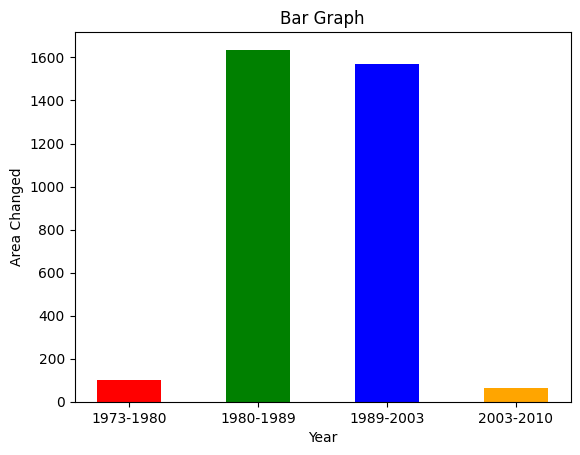

In [42]:
# x-coordinates of left sides of bars 
left = [1,2,3,4]

# heights of bars
height = AreaDifference

# labels for bars
tick_label = ['1973-1980', '1980-1989', '1989-2003', '2003-2010']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,width = 0.5, color = ['red', 'green','blue','orange'])

# naming the x-axis
plt.xlabel('Year')
# naming the y-axis
plt.ylabel('Area Changed')
# plot title
plt.title('Bar Graph')

# function to show the plot
plt.show()